In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
import logging
logging.basicConfig(level=logging.INFO, format=' %(asctime)s - %(levelname)s - %(message)s')

import levy_stable_jax as lsj
import jax.numpy as jnp
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import levy_stable as sp_levy_stable
import jax

sp_levy_stable.parameterization = "S0"


'1.13.0'

In [106]:
# (alpha, beta) = (1.5944529757446195, 0.9140602576756717)
(alpha, beta) = (1.9999989999999999, 0.9999890000100001)
# (alpha, beta) = (1.2, -0.9999) #9999890000100001)
alpha = 1.9193154521329552
beta = 0.8991364476436018
loc, scale = 0.0, 1.0

<Axes: >

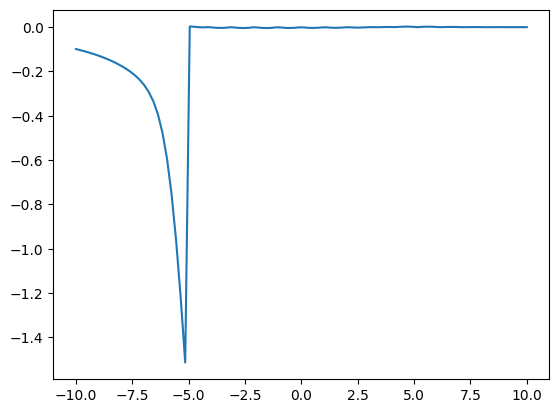

In [107]:
xs = jnp.linspace(-10, 10, 100)
sns.lineplot(x=xs,
             y=lsj.logpdf(xs, alpha,beta,loc, scale, "N0")-sp_levy_stable.logpdf(xs,alpha=alpha, beta=beta))
# sns.lineplot(x=xs,
#              y=sp_levy_stable.logpdf(xs,alpha=alpha, beta=beta))

<Axes: >

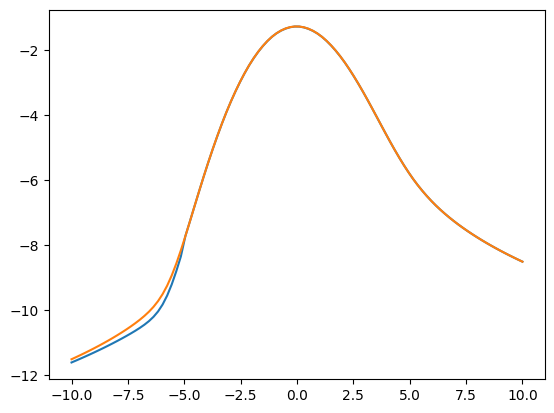

In [112]:
xs = jnp.linspace(-10, 10, 100)
sns.lineplot(x=xs,
             y=lsj.logpdf(xs, alpha,beta))
sns.lineplot(x=xs,
             y=sp_levy_stable.logpdf(xs,alpha=alpha, beta=beta))

In [109]:
lpdf = levy_stable_jax._cache.jax_read_from_cache("logpdf")
lpdf.shape

NameError: name 'levy_stable_jax' is not defined

In [ ]:
locs = jnp.asarray([1.0, 2.0])
scales = jnp.asarray(1.0)
A = jnp.asarray([[1,2],[3,4],[5,6]])
b = jnp.asarray([[2,2,2]]).T

A * locs + b

In [ ]:
locs = jnp.asarray([1.0, 1.1])
scales = 2.0
A = jnp.asarray([[1,2],[3,4],[5,6]])
b = jnp.asarray([[2,2,2]]).T
(beta1, loc1, scale1) = lsj.shift_scale(2.0, 0.0,locs, scales, A,b,"N1")
(beta1, loc1, scale1)

In [ ]:
lsj.sum(2.0, beta1, loc1, scale1, param="N1", axis=0)

In [ ]:
raise

In [ ]:
from levy_stable_jax.distribution import TAB_X_CUTOFF, NUM_X_POINTS, ALPHA_MIN, ALPHA_MAX, NUM_ALPHA_POINTS, BETA_MIN, BETA_MAX, NUM_BETA_POINTS
xs = np.linspace(-TAB_X_CUTOFF, TAB_X_CUTOFF, NUM_X_POINTS)
alphas = np.linspace(ALPHA_MIN, ALPHA_MAX, NUM_ALPHA_POINTS)
betas = np.linspace(BETA_MIN, BETA_MAX, NUM_BETA_POINTS)
dx = 2 * TAB_X_CUTOFF / NUM_X_POINTS
NUM_BETA_POINTS

In [ ]:
alpha_idx = 40
beta_idx = 43
ys = np.array(lpdf[:,alpha_idx,beta_idx])
alpha = alphas[alpha_idx]
beta = betas[beta_idx]
print("alpha",alpha,"beta",beta)
with levy_stable_jax._utils.set_stable("N0"):
    ys0 = sp_levy_stable.logpdf(xs, alpha=alpha, beta=beta)
sns.lineplot(x=xs, y=ys0)
sns.lineplot(x=xs, y=ys)


In [ ]:
beta

In [ ]:
sns.scatterplot(x=xs, y=np.gradient(lpdf[:,alpha_idx,beta_idx]))

In [ ]:
sns.scatterplot(x=xs, y=ys)

# Scipy returns incorrect interpolation values

It should never happen with logpdf

In [ ]:
x = 0.1
betas = np.linspace(-1.0,1.0,NUM_BETA_POINTS)
ys = levy_stable_jax.logpdf(0.0, alpha=1.555696, beta=betas, loc=0.0, scale=1.0)
# list(zip(ys,betas))

In [ ]:
sns.lineplot(x=betas, y=ys)

In [ ]:
lpdf = levy_stable_jax._cache.jax_read_from_cache("logpdf")

In [ ]:
xs = np.linspace(-TAB_X_CUTOFF, TAB_X_CUTOFF, NUM_X_POINTS)
alphas = np.linspace(ALPHA_MIN, ALPHA_MAX, NUM_ALPHA_POINTS)
betas = np.linspace(BETA_MIN, BETA_MAX, NUM_BETA_POINTS)

with levy_stable_jax._utils.set_stable("N0"):
    # ys = sp_levy_stable.logpdf(xs[101], alphas[41],betas[72:74])
    # ys = sp_levy_stable.logpdf(xs, alphas[41],betas[73])
    ys = sp_levy_stable.logpdf(xs, 1.1,-0.14)
    sns.lineplot((ys))
    # sns.lineplot(np.gradient(ys))
    # sns.lineplot(np.gradient(np.gradient(ys))/(dx * dx))
    # sns.lineplot(np.gradient(np.gradient(np.gradient(ys))/(dx * dx * dx)))
    # ys = sp_levy_stable.logpdf(xs, alphas[41],betas[72])
    # sns.lineplot(ys)


In [ ]:
def is_kink(z):
    before = np.array(z)
    before[:-1] = z[1:]
    after = np.array(z)
    after[1:] = z[:-1]
    epsi = 1e-1
    return (((z > before + epsi) & (z > after + epsi)) | ((z < before - epsi) & (z < after - epsi)))
ys1 = np.gradient(ys) / dx
n = len(ys)
ys2 = np.gradient(ys1)/dx
# ys3 = np.gradient(ys2)/dx
kink_mask = is_kink(ys)
mode_idx = np.sum(ys1 < 0)
jump_mask = kink_mask #(np.abs(ys2) > 0.05) & (np.arange(n) > mode_idx - 10) & (np.arange(n) < mode_idx + 10)
# sns.lineplot(np.abs(ys2[mode_idx-10:mode_idx+15]))
kink_mask
# jump_mask

import scipy
f = scipy.interpolate.interp1d(xs[~jump_mask], ys[~jump_mask], bounds_error=False)
y_corr = np.where(jump_mask, f(xs), ys)

In [ ]:
sns.lineplot(((y_corr)))

In [ ]:
sns.lineplot(np.gradient((y_corr)))

In [ ]:
# sns.lineplot(lpdf[101,40,:])
sns.lineplot(np.gradient(lpdf[101,41,:]))
# sns.lineplot(lpdf[101,42,:])

In [ ]:
for i in range(2):
    for j in range(2):
        # sns.lineplot(np.gradient(lpdf[101:103,41:43,:],axis=-1)[i,j,:])
        sns.lineplot((lpdf[101:103,41:43,:])[i,j,:])


In [ ]:
sns.lineplot(sp_levy_stable.logpdf(0.0, alpha=1.555696, beta=betas, loc=0.0, scale=1.0))

In [ ]:
np.sum(np.isinf(lpdf)),np.sum(~np.isinf(lpdf))

In [ ]:
np.sum(np.isinf(lpdf), axis=0)

In [ ]:
lpdf[:, 0, 0]